# Lab: Numpy, Pandas and Matplotlib

### Important: do not delete any blocks
#### But you may add as many as you need.

This aim of this lab is to get you aquainted to very important python modules (libraries):
- numpy
- pandas
- matplotlib

Make sure to install these modules before you start.

#### About tasks

This notebook consists of numerous tasks but please make it look like a whole story: a report with your own code, thoughts and conclusions. In some of these tasks you will have to implement some custom functions, in some of them you will be asked to present some plots and describe them. Please try to make your code as short as possible and your answers as clear as possible.

#### Evaluation

- Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url. 
- There are **Questions** in the tasks, don't skip them. If you skip a question, value of the task becomes 0. 
- When your answer includes some numbers, make sure to provide some code or calculations that prove your results.
- Pay a lot attention to your plots:
    - Are they comprehensible? Shapes, colours, sizes?
    - Are they titled?
    - Are axes labelled?
    - Is legend included?

#### How to submit
- Name your file according to this convention: `2022_lab01_GroupNumber_Surname_Name.ipynb`, for example 
    - `2022_lab01_404_Sheipak_Sviat.ipynb`
    - `2022_lab01_NoGroup_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2022_lab01_GroupNumber_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is `2022-09-29 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://disk.yandex.ru/d/FnMXcdDjbWTxTw

## Part 1. Numpy and plots [2.5 points]

`numpy` is a module that helps you to deal with vectors (matrices and tensors too) and it has a lot of cool features.

Firstly, let's import it:

In [1]:
import numpy as np

Vectors in numpy are called **arrays**. Create an array from a list:

In [2]:
my_list = [1, 2, 3, 4, 5, 6]
my_vector = np.array(my_list)
print(my_list)
print(my_vector)

[1, 2, 3, 4, 5, 6]
[1 2 3 4 5 6]


You can reshape them:

In [3]:
my_vector = my_vector.reshape((2, 3))
print(my_vector.shape)
print(my_vector)

my_vector = my_vector.reshape((6, 1))
print(my_vector.shape)
print(my_vector)

(2, 3)
[[1 2 3]
 [4 5 6]]
(6, 1)
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


You don't even have to state all of dimensions explicitly, since they can be derived (use -1):

In [4]:
my_vector = my_vector.reshape((3, -1))
print(my_vector.shape)
print(my_vector)

(3, 2)
[[1 2]
 [3 4]
 [5 6]]


Slices!

In [5]:
print(my_vector[0, 1])
print(my_vector[:, 1])
print(my_vector[:2])
print(my_vector[:2,::-1])

2
[2 4 6]
[[1 2]
 [3 4]]
[[2 1]
 [4 3]]


Arithmetic operations:

In [6]:
vector_a = np.arange(10)
print(vector_a)
print(vector_a - 10)
print(vector_a * 100)
print(np.array([5, 4]) + np.array([1, 6]))
print(np.array([5, 4]) * np.array([1, 6]))

[0 1 2 3 4 5 6 7 8 9]
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1]
[  0 100 200 300 400 500 600 700 800 900]
[ 6 10]
[ 5 24]


**Task 1. Basic arrays [0.5 point]** 

Create a 2-dimensional numpy array `x` of 100 by 2 shape filled with random numbers from $U[0, 1]$

In [7]:
x = np.random.rand(100, 2)

assert x.shape == (100, 2), "Wrong shape"
assert x.min() >= 0 and x.max() <= 1, "Wrong range"
assert np.abs(x.mean() - 0.5) < 8e-2, "Wrong distribution or bad luck"
x.mean()

0.5442954968175457

Calculate averages: row-wise, column-wise and total. Use `np.mean` and `axis` parameter. Then `print` the `mean_total` rounded to 3 digits after comma (using `format` method).

In [9]:
mean_by_row = np.mean(x, axis=1)
mean_by_col = np.mean(x, axis=0)
mean_total = np.mean(x)

assert mean_by_row.shape == (100, )
assert mean_by_col.shape == (2, )
assert mean_total.shape == ()

print("The total mean is {:.3f}".format(mean_total))

The total mean is 0.544


**Task 2. Sort 2-dim array [0.5 point]** 

Create a 1-dimensional numpy array `y` of 100 random **integers** from $U\{0, 1, 2, 3\}$

In [17]:
y = np.random.choice([0, 1, 2, 3], size=100)

assert y.shape == (100,)

Import class `Counter` from `collections` module.

In [12]:
from collections import Counter

In [37]:
basic_counter = Counter(y)
container_A = dict(basic_counter)
container_B = list(basic_counter.items())
container_C = np.array(container_B)
container_C

array([[ 2, 27],
       [ 3, 24],
       [ 0, 20],
       [ 1, 29]])

In [38]:
print(container_A, container_B, container_C)

{2: 27, 3: 24, 0: 20, 1: 29} [(2, 27), (3, 24), (0, 20), (1, 29)] [[ 2 27]
 [ 3 24]
 [ 0 20]
 [ 1 29]]


Here are three data structures.

**Question:** What is the type of `container_A`? What is the type of `container_B`? What is the type of the elements of `container_C`?

**Your answer: container_A-словарь container_B-список container_C-массив списков** 

Use `np.sort` to order elements of `container_C` acsending by their first coordinate (pay attention to `axis` parameter).

In [43]:
sorted_indices = np.argsort(container_C[:, 0])
counter_values = container_C[sorted_indices]


assert list(counter_values[:, 0]) == [0, 1, 2, 3], "Error: Wrong order"
assert min([container_A[x[0]] == x[1] for x in counter_values]), "Error: Count values shuffled"
print("Great!")

Great!


**Task 3. Basic barplot [0.5 points]** 

Plot a barplot representing how many times each value `0, 1, 2, 3` is encounterd in `y`. Do not forget to:
- Add title to the plot
- Label the axes
- Specify x-ticks 

You may use `counter_values` you have obtained in a Task 2.

In [45]:
import matplotlib.pyplot as plt

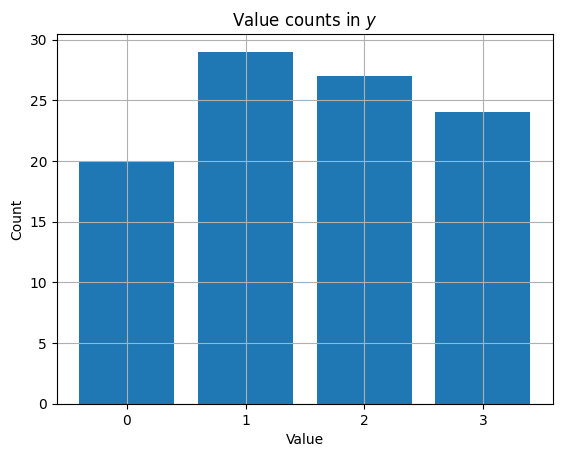

In [52]:
plt.title("Value counts in $y$")
plt.bar(counter_values[:, 0], counter_values[:, 1])
plt.xticks(counter_values[:, 0])
plt.xlabel("Value")
plt.ylabel("Count")
plt.grid(10)
plt.show()

**Task 4. Concat two numpy arrays [0.5 point]**

You have:
- `x`: 100 $\times$ 2
- `y`: 100

Concatenate them horizontally to get `z`: 100 $\times$ 3

In [54]:
z = np.concatenate([x, y.reshape(-1, 1)], axis=1)

assert z.shape == (100, 3) and np.equal(z[:, :2], x).all() and np.equal(z[:, -1], y).all()

array([[0.04142239, 0.4733328 , 2.        ],
       [0.36527559, 0.54031518, 2.        ],
       [0.88677244, 0.93429797, 3.        ],
       [0.19506757, 0.6663743 , 3.        ],
       [0.01465763, 0.53960984, 3.        ],
       [0.64201971, 0.40619616, 0.        ],
       [0.50074369, 0.9747983 , 3.        ],
       [0.05688749, 0.59444088, 0.        ],
       [0.67980375, 0.42610984, 2.        ],
       [0.99365661, 0.90633192, 2.        ],
       [0.48008317, 0.48073268, 0.        ],
       [0.94230461, 0.24100609, 0.        ],
       [0.48129056, 0.6574887 , 2.        ],
       [0.4636906 , 0.05899234, 1.        ],
       [0.7342229 , 0.58380097, 1.        ],
       [0.6240233 , 0.75573957, 3.        ],
       [0.81854395, 0.74875372, 0.        ],
       [0.86372446, 0.46841078, 0.        ],
       [0.85408804, 0.13741702, 3.        ],
       [0.27601476, 0.62317053, 2.        ],
       [0.98727915, 0.89470306, 2.        ],
       [0.44575022, 0.89598301, 1.        ],
       [0.

**Task 5. Basic Scatter Plot [0.5 point]**

You have:
- `z`: 100 $\times$ 3

Each row of `z` consists of 3 numbers. Build a scatter plot where each row is represented by a dot: first and second number are coordinates and third number corresponds to dot colour. Don't forget to add a legend.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


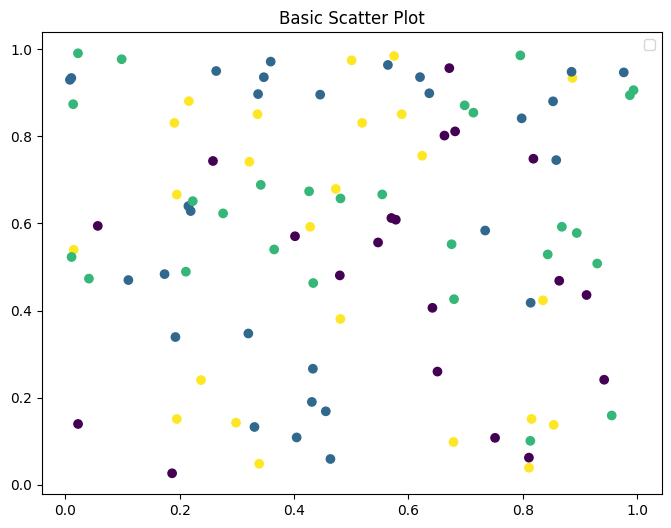

In [57]:
plt.figure(figsize=(8, 6))
plt.title("Basic Scatter Plot")
plt.scatter(z[:,0], z[:,1], c=z[:,2], cmap='viridis')

plt.legend(loc="upper right")
plt.show()

# Part 2. Moscow houses [4.5 points]

In this part we start to work with datasets and `pandas` module.
You will need to download `moscow_coords.csv` file. It provides a coordinate and an address for some houses in Moscow. The original source of the data: https://data.mos.ru/opendata/60562/data/table?versionNumber=3&releaseNumber=445

In [58]:
import pandas as pd

In [68]:
coords_db = pd.read_csv("data")

PermissionError: [Errno 13] Permission denied: 'data'

In [63]:
coords_db.head(10)

NameError: name 'coords_db' is not defined

In [ ]:
print(type(coords_db))
print(coords_db.shape)
print(coords_db.columns)
print(type(coords_db["ADDRESS"]))

**Task 1. Address analysis [0.5 point]**

As we can see, the dataset has 3 columns: `ADDRESS`, `coor_x` and `coor_y`.
Let's focus on `ADDRESS` - the datatype of this column is `str`.

Your task is to find and describe addresses that inlcude word `город`* at least two times.

**город* - *city* in russian

Let's do it step by step:
1. Implement a function `tokenize_address`, that takes a string

* casts string to lowercase;
    
* removes all `,` and `.` symbols;
    
* splits string into a `list` of strings; separation symbol is a whitespace ` `.
    
2. Implement a function `count_a_token`, that takes a list of strings and counts number of entries of a particular token.

In [ ]:
def tokenize_address(input_string):
    """
    input:
    - input_string: str
    output:
    - list<str> - string split into tokens
    """
    # YOUR CODE HERE
    
    return # YOUR CODE HERE

assert tokenize_address("A, b. C, and d?") == ["a", "b", "c", "and", "d?"], "Something is wrong"

In [ ]:
def count_a_token(token_list, lookup_token):
    """
    input:
    - token_list: list<str>
    - lookup_token: str
    output:
    - int - how many times lookup_token is encountered in token_list
    """
    # YOUR CODE HERE

In [ ]:
test_address = "город Москва, улица Космонавта Волкова, дом 10."
tokens = tokenize_address(test_address)
print(tokens)
print(count_a_token(tokens, "город"))

assert tokens == ["город", "москва", "улица", "космонавта", "волкова", "дом", "10"]
assert count_a_token(tokens, "город") == 1
print("Seems fine!")

Now it is time add new column `city_token_cnt` to the dataset. Values in this column should be a result of applying two functions above to a `coords_db["ADDRESS"]`. Note that `coords_db["ADDRESS"]` is a `pandas.Series` object and it has method `apply`.

In [ ]:
coords_db.loc[:, "city_token_cnt"] = coords_db["ADDRESS"].apply(lambda x: count_a_token(tokenize_address(x), "город"))

In [ ]:
coords_db.head()

And the final step: let's do a `groupby` by column `city_token_cnt` to find out how many addresses have token `город` two times or more.

In [ ]:
stats = coords_db.groupby(# YOUR CODE HERE

In [ ]:
stats

**Question**: how many addresses have token `город` two times or more?

**Your answer**: 

**Task 2. Count 2-grams [1 point]**

For a sequence of tokens `["a_1", "a_2", ..., "a_N"]` **n-gram** is a subsequence of **n** consecutive tokens.

For example: given a sequence of tokens `["a", "b", "c", "d"]` it has:
- Four unigrams: `["a"], ["b"], ["c"], ["d"]`
- Three 2-grams: `["a", "b"], ["b", "c"], ["c", "d"]`
- Two 3-grams: `["a", "b", "c"], ["b", "c", "d"]`
- One 4-gram: `["a", "b", "c", "d"]`

Your task is two find all 2-grams that start with `город` token and count their occurences in all addresses.

Firstly, impement a function `get_n_grams`:

In [ ]:
def get_n_grams(input_tokens, n):
    """
    input:
    - input_tokens: list<str>
    - n: int, size of n-grams
    output:
    - list<list<str>> - list of n-grams
    """
    # YOUR CODE HERE

In [ ]:
assert get_n_grams(["a", "b", "c", "d"], 1) ==  [['a'], ['b'], ['c'], ['d']]
assert get_n_grams(["a", "b", "c", "d"], 2) ==  [['a', 'b'], ['b', 'c'], ['c', 'd']]
assert get_n_grams(["a", "b", "c", "d"], 3) ==  [['a', 'b', 'c'], ['b', 'c', 'd']]
assert get_n_grams(["a", "b", "c", "d"], 4) ==  [['a', 'b', 'c', 'd']]

print("OK, seems fine!")

Secondly, define a function that will filter list of n-grams by the first element of an n-gram:

In [ ]:
def filter_n_grams(n_grams, lookup_token):
    """
    input:
    - n_grams: list<list<str>>
    - lookup_token: str
    output:
    - list<list<str>> - sublist of n-grams first token of which is equal to lookup_token
    """
    # YOUR CODE HERE

In [ ]:
assert filter_n_grams([
    ["a", "b"], 
    ["a", "c"],
    ["b", "d"],
    ["d", "a"]
    ], 
    "a") == [["a", "b"], ["a", "c"]] 

print("Seems fine!")

Back to our dataset. Leave rows with `city_token_cnt >= 2`

In [ ]:
sub_db = coords_db[# YOUR CODE HERE
print(sub_db.shape)
sub_db.head(5)

Let's build a dict that contains counts of 2-grams: 
```
{
    "город x": cnt_x,
    "город y": cnt_y,
     ...
    "город N": cnt_N
      
}
```
Note that key is a string `"город x"`, not a list `["город", "x"]` - list cannot be a key in a dict.

In [ ]:
counter_dict = {}
for address in sub_db["ADDRESS"]:
    tokens = # YOUR CODE HERE
    n_grams = # YOUR CODE HERE
    filtered_n_grams = # YOUR CODE HERE
    for x in filtered_n_grams:
        key = # YOUR CODE HERE
        counter_dict[key] = 1 if key not in counter_dict else counter_dict[key] + 1

In [ ]:
counter_dict

**Task 3. Garden Ring houses scatterplot [1 points]**

We need to find houses that are located near the Garden Ring. There can be a lot of definitions of *near* - but in our case *near* means inside a polygon. Inner and outer polygon points can be found in files: `inner_poly.csv` and `outer_poly.csv` respectively.

In [ ]:
inner_poly = pd.read_csv("data/inner_poly.csv", header=None).values
outer_poly = pd.read_csv("data/outer_poly.csv", header=None).values
house_points = coords_db[["coor_x", "coor_y"]].values

Let's scatter plot the points:

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Moscow Houses")
plt.scatter(house_points[:, 0], house_points[:, 1], linewidths=0.001, c="grey")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.show()

Ooooops seems a bit wrong. 

**Question**: why does the plot look so strange? How to fix it?

**Your answer:**

Now fix the `house_points` array, remove a set of points in the bottom left corner:

In [ ]:
house_points = # YOUR CODE HERE

And scatter it again:

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Moscow Houses")
plt.scatter(house_points[:, 0], house_points[:, 1], linewidths=0.001, c="grey")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.show()

Let's do a little zoom-in: filter `house_points` and leave points in some **small square** near the garden ring. The choice of the size of the square is up to you, but the outer poly should be inside this square.

I have already defined a small square, but you can change its sizes.

In [ ]:
lower_x = 37.56
upper_x = 37.68
lower_y = 55.70
upper_y = 55.80

def filter_points_by_square(input_array, lower_x, upper_x, lower_y, upper_y):
    # YOUR CODE HERE

In [ ]:
small_square_points = filter_points_by_square(house_points, lower_x, upper_x, lower_y, upper_y)

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Houses in city center")
plt.scatter(small_square_points[:, 0], small_square_points[:, 1], linewidths=0.001, c="grey")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.show()

**Task 4. Houses in a polygon [Extra]**

Implement a function, that by two coordinates of a point and list of coordinates of the polygon tells whether this point is inside a polygon or not.

You may define as many others functions as you want.

*Hint: the polygons may be regarded as convex.*

**Question:** what algorithm to decide whether the point is inside will you implement? Why is it supposed to work?

**Your answer:**

In [ ]:
# YOUR CODE HERE

In [ ]:
def point_is_inside(point, polygon_points):
    """
    input:
    - point np.array of (1, 2) shape
    - polygon_points np.array of (N, 2) shape
    output:
    - bool True if point is inside, false if point is outside
    """
    # YOUR CODE HERE

And the final part! 

Scatter plot `small_square_points` again, but with 3 different colours:
- colour 1: points inside inner poly
- colour 2: points outside outer poly
- colour 3: points between inner and outer polys

In [ ]:
# YOUR CODE HERE

**Question:** How many points are there between inner and outer polys?

**Your answer:**

# Part 3. Titanic Dataset - Stats and Plots [8 points]


In this part we are going to analyze the "Titanic dataset".
The main goal of this task is to describe the data.

Here are some tips:
- use plots
- notice pecualrities in the data
- present verbal explanations, don't be too shy

**Important** Please pay attention to your plots: titles, axis-labels and legends are necessary.

These  tasks involve `numpy`, `pandas` and `matplotlib` - very common python modules. In one task you may use `scipy`.

#### Input data
This task uses 2 files:
- `passengers_record.csv` contains some general information on passengers (name, class, age, etc.)
- `survival_info.csv` contains binary labels whether passenger survived or not

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Task 1. [1 point]**

Read these files and join them into single dataset (use `passenger_id` as join key). Then provide some description of the dataset: 
- What are age/gender/class distributions and their averages? How many people belong to each group?
- Find the oldest/youngest passangers in every class
- Compare survival rates between classes/age groups/genders (configuration of age groups is up to you)

In [102]:
passengers_record = pd.read_csv('passengers_record.csv')
survival_info = pd.read_csv('survival_info.csv')
assert passengers_record.shape == (891, 11) and survival_info.shape == (891, 2), "Wrong db shapes"


,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


In [103]:
db = pd.merge(passengers_record,survival_info, on='PassengerId')
db

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


**Task 2. [2 points]**

Compare average age per class: can we consider these values to be equal? Use visualisation to prove your point. 

Can we answer this question using the T-test? Why? Here you may use `scipy.stats`.

In [108]:
a_df=np.unique(db[['Pclass']], axis=0)
a_df

array([[1],
       [2],
       [3]], dtype=int64)

In [111]:
db = db.dropna(subset=['Age'])
db

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,0
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [112]:
#for i in(db[index]):
average_age_by_class = db.groupby('Pclass')['Age'].mean()

print("Average Age by Passenger Class:")
print(average_age_by_class)

Average Age by Passenger Class:
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [114]:
passenger_count_by_class = db['Pclass'].value_counts()

print("Passenger Count by Class:")
print(passenger_count_by_class)

Passenger Count by Class:
Pclass
3    355
1    186
2    173
Name: count, dtype: int64


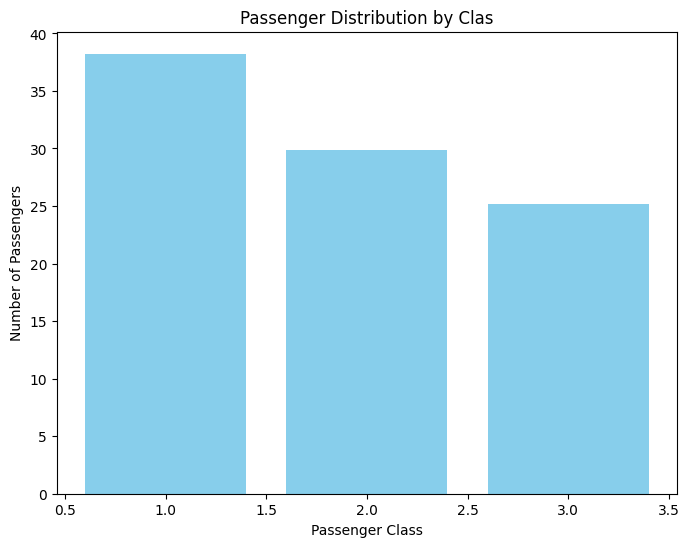

In [116]:
plt.figure(figsize=(8, 6))
plt.bar(average_age_by_class.index, average_age_by_class.values, color='skyblue')
plt.title('Passenger Distribution by Clas')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

In [121]:
from scipy.stats import ttest_ind

# Separate the age data by passenger class
class_1_age = db[db['Pclass'] == 1]['Age'].dropna()
class_2_age = db[db['Pclass'] == 2]['Age'].dropna()
class_3_age = db[db['Pclass'] == 3]['Age'].dropna()

# Perform t-test for class 1 vs class 2
t_statistic, p_value_class_1_2 = ttest_ind(class_1_age, class_2_age, equal_var=False)

# Perform t-test for class 1 vs class 3
t_statistic, p_value_class_1_3 = ttest_ind(class_1_age, class_3_age, equal_var=False)

# Perform t-test for class 2 vs class 3
t_statistic, p_value_class_2_3 = ttest_ind(class_2_age, class_3_age, equal_var=False)

# Print or display the results
print(f"P-value for class 1 vs class 2: {p_value_class_1_2}")
print(f"P-value for class 1 vs class 3: {p_value_class_1_3}")
print(f"P-value for class 2 vs class 3: {p_value_class_2_3}")

P-value for class 1 vs class 2: 7.396039343471019e-08
P-value for class 1 vs class 3: 1.0732266585658955e-21
P-value for class 2 vs class 3: 0.00019038678961437512


Мы можем сравнить,P-value в первом очень высокий,мы не можем считать эти значения равными,в целом.

**Task 3. [2 points]**

Use `plt.subplots` to create side-by-side histograms of distributions:
- columns: 3 classes
- rows: age, fare, sex, survival rate

The output is 4 by 3 table of plots.

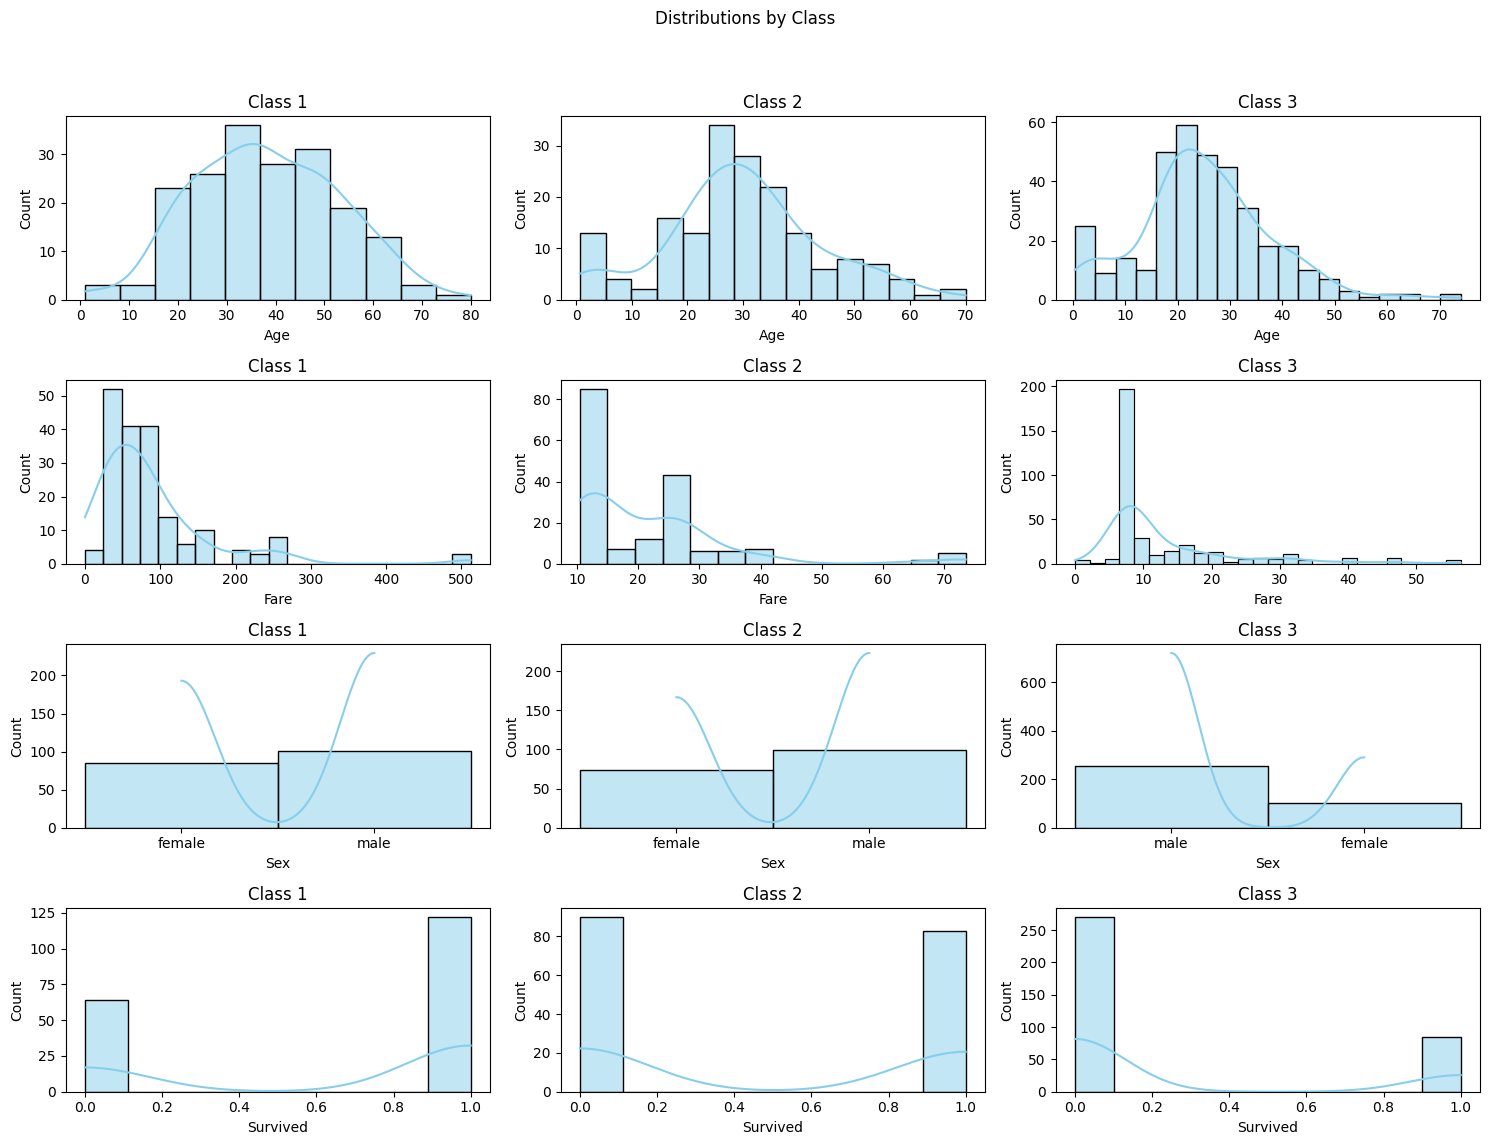

In [128]:
import seaborn as sns
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Distributions by Class')

for i, column in enumerate(['Age', 'Fare', 'Sex', 'Survived']):
    for j in range(3):
        sns.histplot(db[db['Pclass'] == j+1][column], ax=axes[i, j], kde=True, color='skyblue')
        axes[i, j].set_title(f'Class {j+1}')
        if i == 3:
            axes[i, j].set_xlabel(column.capitalize())
        if j == 0:
            axes[i, j].set_ylabel('Count')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Task 4. [1 point]**

Find 5 most common **surnames** in passenger list. Try to use `pandas.Series.apply` and lambda-function to extract surnames.

In [136]:
db.loc[:, 'surname'] = db['Name'].apply(lambda full_name: full_name.split(',')[0].strip())

top_surnames = db['surname'].value_counts().head(5)

print("5 Most Common Surnames:")
print(top_surnames)

5 Most Common Surnames:
surname
Andersson    9
Skoog        6
Johnson      6
Goodwin      6
Carter       6
Name: count, dtype: int64


**Task 5. [2 points]**

Probably you already have noticed that there are missing values in the dataset. We will try to fix that.
1. Omit all the rows, that contain missing values. Is the result plausible? How does this method effect amount of data and values from Task 1 (age histograms, survival rates, etc.?)
2. Suggest some better options to handle missing values in the data and check if it distorts the statistics.

### Great! Don't forget to submit before the deadline :)